# **Summer Olympics Data Analysis Assignment**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Reading

In [38]:
df1 = pd.read_csv('summer.csv')

In [39]:
df1.shape

(31165, 9)

In [40]:
df1.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### Data Preprocessing

In [ ]:
df1.isnull()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.dropna()

### so, Now the Data is Cleaned and ready to be Analysed

### **1.** **In how many cities Summer Olympics is held so far?**

In [44]:
df2 = df1['City'].unique()
print("The Number of Cities in which Summer Olympics is held are", len(df2))
print(df2)

('The Number of Cities in which Summer Olympics is held are', 22)
['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


### **2. Which sport is having most number of Gold Medals so far? (Top 5)**

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


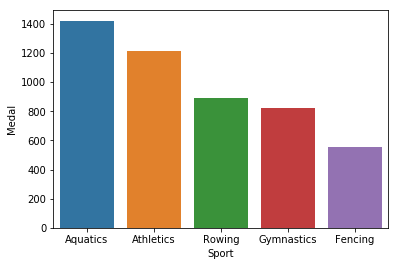

In [45]:

df3 = df1[df1['Medal']=='Gold'].groupby('Sport').agg({'Medal': 'count'})
df3.reset_index(inplace=True)
df3.sort_values(by='Medal',ascending=False,inplace=True)
temp_df3 = df3.head()
sns.barplot(x='Sport',y='Medal',data=temp_df3)
temp_df3

### **3. Which sport is having most number of medals so far? (Top 5)**

,Sport,Medal
0,Aquatics,4170
2,Athletics,3638
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613


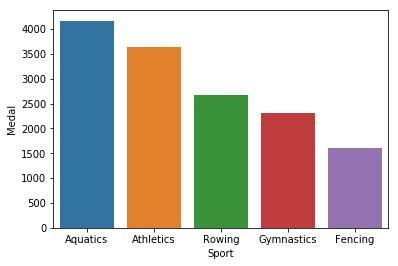

In [46]:
df4 = df1.groupby('Sport').agg({'Medal': 'count'})
df4.reset_index(inplace=True)
df4.sort_values(by='Medal',ascending=False,inplace=True)
temp_df4 = df4.head()
sns.barplot(x='Sport',y='Medal',data=temp_df4)
temp_df4

### **4. Which player has won most number of medals? (Top 5)**

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13


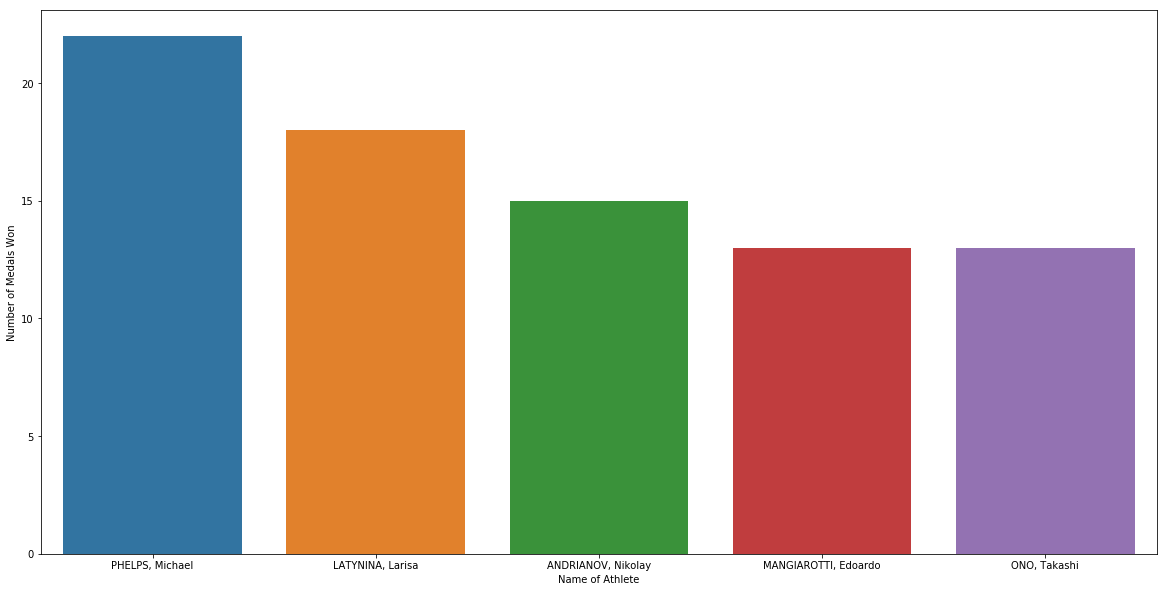

In [47]:
df5 = df1.groupby('Athlete').agg({'Medal': 'count'})
df5.reset_index(inplace=True)
df5.sort_values(by='Medal',ascending=False,inplace=True)
temp_df5 = df5.head()
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Athlete',y='Medal',data=temp_df5,ax=ax)
plt.xlabel("Name of Athlete")
plt.ylabel("Number of Medals Won")
temp_df5

### **5. Which player has won most number Gold Medals of medals? (Top 5)**

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9


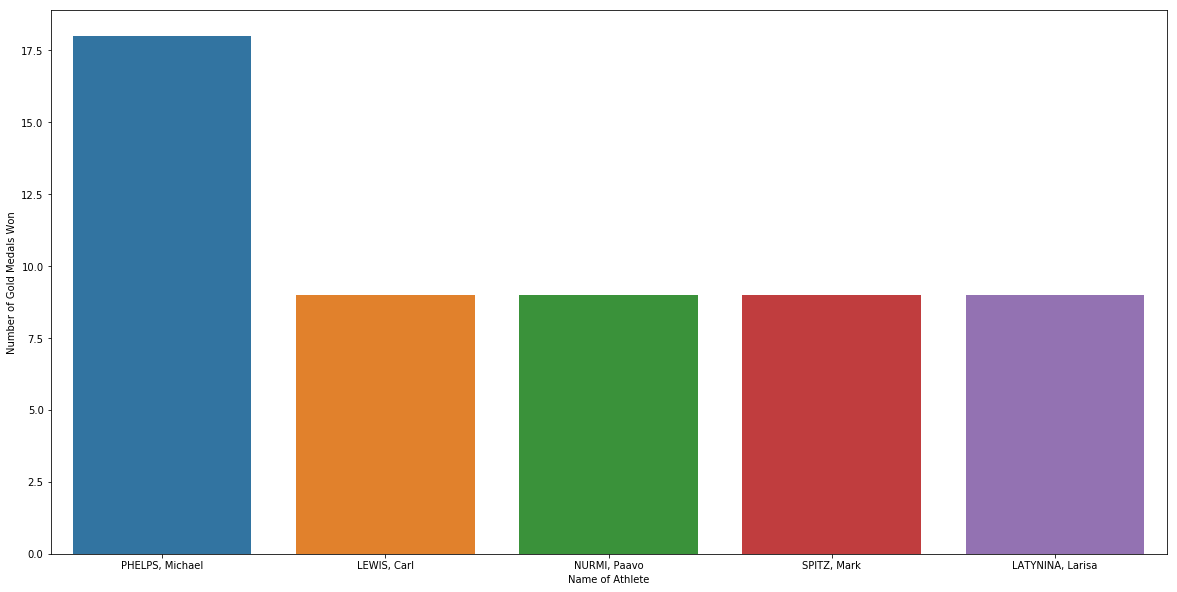

In [48]:
df6 = df1[df1['Medal']=='Gold'].groupby('Athlete').agg({'Medal': 'count'})
df6.reset_index(inplace=True)
df6.sort_values(by='Medal',ascending=False,inplace=True)
temp_df6 = df6.head()
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Athlete',y='Medal',data=temp_df6,ax=ax)
plt.xlabel("Name of Athlete")
plt.ylabel("Number of Gold Medals Won")
temp_df6

### **6. In which year India won first Gold Medal in Summer Olympics?**

In [49]:
df_temp = df1[(df1['Medal']=='Gold') & (df1['Country']=='IND')].head(1)
print("The year in which India won its first Gold Medal in", df_temp['Year'].values[0],"in",df_temp['City'].values[0],"for sport of",df_temp['Sport'].values[0])
df_temp

('The year in which India won its first Gold Medal in', 1928, 'in', 'Amsterdam', 'for sport of', 'Hockey')


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


### **7. Which event is most popular in terms on number of players? (Top 5)**

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973


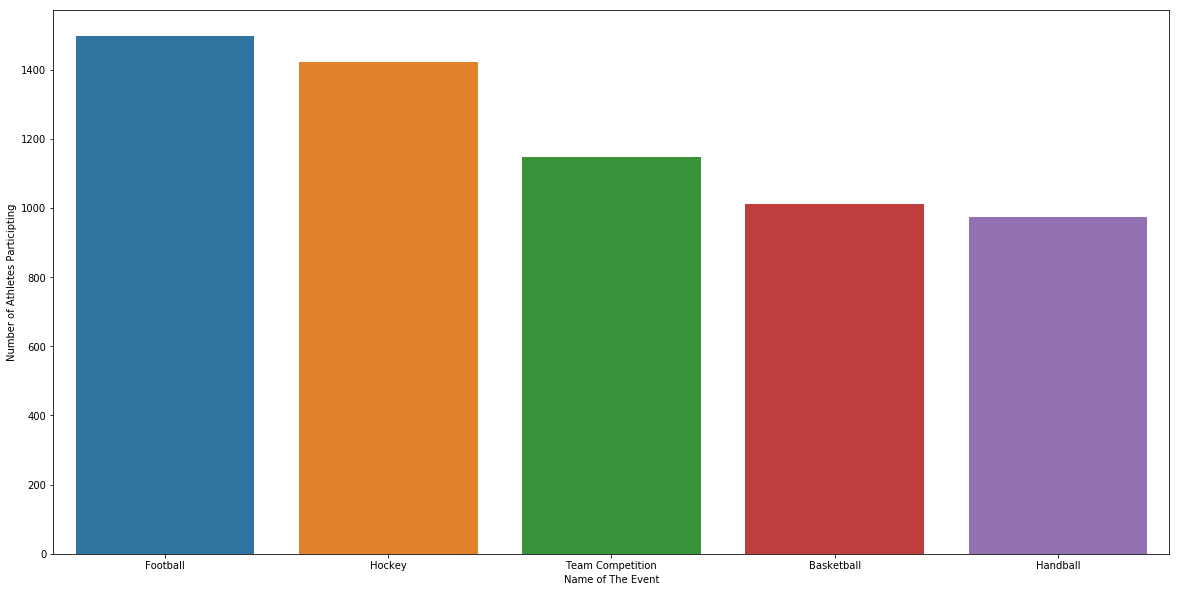

In [50]:

df7 = df1.groupby('Event').agg({'Athlete': 'count'})
df7.reset_index(inplace=True)
df7.sort_values(by='Athlete',ascending=False,inplace=True)
temp_df7 = df7.head()
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Event',y='Athlete',data=temp_df7,ax=ax)
plt.xlabel("Name of The Event")
plt.ylabel("Number of Athletes Participting")
temp_df7

### **8. Which sport is having most female Gold Medalists? (Top 5)**

,Sport,Medal
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166


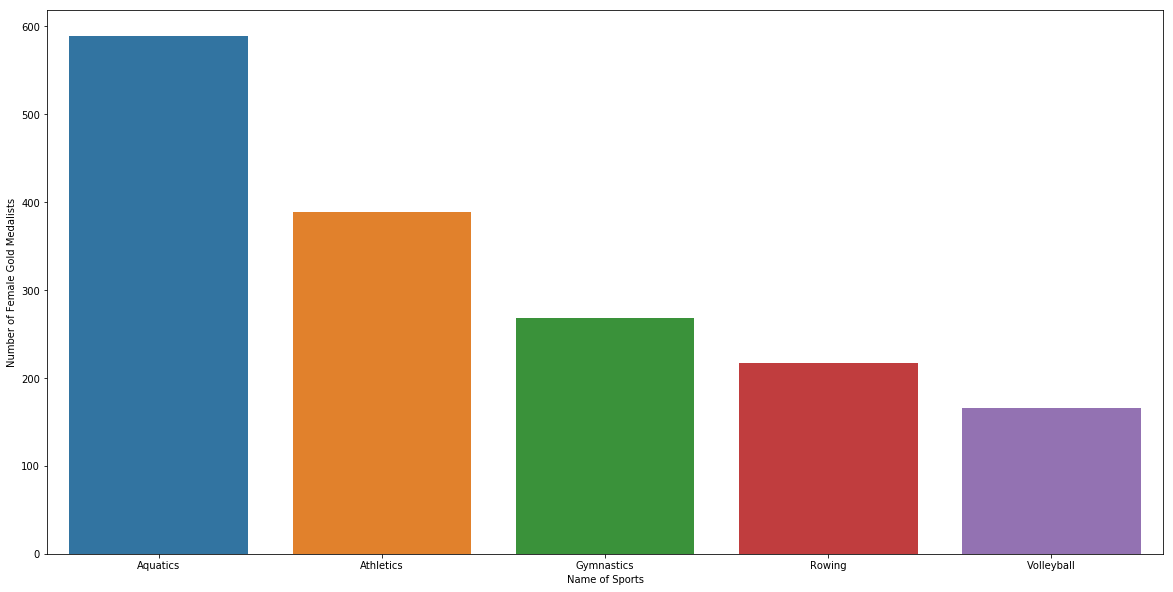

In [51]:
df8 = df1[(df1['Medal']=='Gold') & (df1['Gender']=='Women')].groupby('Sport').agg({'Medal': 'count'})
df8.reset_index(inplace=True)
df8.sort_values(by='Medal',ascending=False,inplace=True)
temp_df8 = df8.head()
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Sport',y='Medal',data=temp_df8,ax=ax)
plt.xlabel("Name of Sports")
plt.ylabel("Number of Female Gold Medalists")
temp_df8
